# Изначальный файл с первичным анализом выгруженных новостей

# Но сейчас этот анализ перекочевал в key words matching

In [ ]:
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import csv
import re
from datetime import datetime

import os.path
from os import path
import time

# import sklearn
# import scipy

# from sklearn.naive_bayes import GaussianNB
# import lightgbm as lightgbm
# from xgboost import XGBClassifier
# import keras

# Get Started
# https://github.com/Refinitiv-API-Samples/Article.EikonDataAPI.DotNet.Library
# API limits
# https://developers.refinitiv.com/en/api-catalog/eikon/eikon-data-api/documentation?content=49692&type=documentation_item
import eikon as ek 

from pylab import rcParams
plt.rcParams['figure.figsize'] = 16, 8

In [2]:
fontsize_reg = 12
fontsize_title = 16
from pylab import rcParams
rcParams['figure.facecolor'] = '1'
rcParams['figure.figsize'] = [8.0, 3.5]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 600

rcParams['font.size'] = 12
rcParams['legend.fontsize'] = 'large'
rcParams['figure.titlesize'] = 'large'

In [3]:
# Зададим path для папки проекта и для папок файлов
path_project_folder = 'C:/DAN/t_systems/trade_project/'
folder_name_headlines = 'backup_headlines/'
folder_name_logger = 'logger/'

In [4]:
def get_name_of_latest_file_in_folder(folder_name):
    files_creation_dates = pd.DataFrame(data = [], columns=[
        "folder_name", "file_name", "num_time", "str_time"
    ])

    files_creation_dates['file_name'] = os.listdir(folder_name)
    files_creation_dates['folder_name'] = folder_name
    files_creation_dates['file_folder_and_name'] = files_creation_dates['folder_name'] + files_creation_dates['file_name']
    files_creation_dates
    for i in range(0, len(files_creation_dates)):
        file_folder_and_name = files_creation_dates['file_folder_and_name'][i]
        files_creation_dates['num_time'][i] = os.path.getctime(file_folder_and_name)
        files_creation_dates['str_time'][i] = time.ctime(os.path.getctime(file_folder_and_name))

    latest_file_dir = files_creation_dates.sort_values(by=['num_time'], ascending=False)['file_folder_and_name'].iloc[0]
    
    return latest_file_dir

In [5]:
latest_file = get_name_of_latest_file_in_folder(path_project_folder + folder_name_headlines)
all_headlines_df = pd.read_csv(latest_file, sep=';')
all_headlines_df['versionCreated'] = pd.to_datetime(all_headlines_df['versionCreated'])
print(all_headlines_df.shape, latest_file)

(368988, 6) C:/DAN/t_systems/trade_project/backup_headlines/all_headlines_df_2021-02-17_v8.csv


In [6]:
all_headlines_df

,ric,versionCreated,headline,storyId,sourceCode,story
0,DTEGn.DE,2020-12-23 18:25:27.865000+00:00,IGN Igen Networks joins T-Mobile partner program,urn:newsml:reuters.com:20201223:nNRAdspppv:1,NS:CNSWCH,"<div class=""storyContent"" lang=""en""><style typ..."
1,DTEGn.DE,2020-12-22 08:35:59.285000+00:00,(EN) Makedonski Telekom AD - Skopje Board Chan...,urn:newsml:reuters.com:20201222:nGLF4Kt1L3:2,NS:GLFILE,"<div class=""storyContent"" lang=""en""><p><a href..."
2,DTEGn.DE,2020-12-22 08:35:53.014000+00:00,(EN) Makedonski Telekom AD - Skopje Board Chan...,urn:newsml:reuters.com:20201222:nGLF2DBhZz:2,NS:GLFILE,"<div class=""storyContent"" lang=""en""><p><a href..."
3,DTEGn.DE,2020-12-21 13:08:03.993000+00:00,"WFB (Bus), Anyone? T-Mobile Turns Red Rose Tra...",urn:newsml:reuters.com:20201221:nBw3VPZ4Qa:1,NS:BSW,"<div class=""storyContent"" lang=""en""><style typ..."
4,DTEGn.DE,2020-12-19 09:00:00+00:00,HINTERGRUND-Internet überall dank Satellit und...,urn:newsml:reuters.com:20201219:nL8N2IY3D9:1,NS:RTRS,"<div class=""storyContent"" lang=""de""><style typ..."
...,...,...,...,...,...,...
368983,PFE.N,2021-01-15 12:30:53+00:00,UPDATE 2-Pfizer temporarily reduces COVID vacc...,urn:newsml:reuters.com:20210115:nL8N2JQ2VB:7,NS:RTRS,"<div class=""storyContent"" lang=""en""><style typ..."
368984,PFE.N,2021-01-15 12:27:55+00:00,Pfizer czasowo ograniczy dostawy szczepionki d...,urn:newsml:reuters.com:20210115:nL8N2JQ380:1,NS:RTRS,"<div class=""storyContent"" lang=""pl""><style typ..."
368985,PFE.N,2021-01-15 12:22:57+00:00,UPDATE 1-EU regulator says emails on assessmen...,urn:newsml:reuters.com:20210115:nL4N2JQ2P2:6,NS:RTRS,"<div class=""storyContent"" lang=""en""><style typ..."
368986,PFE.N,2021-01-15 12:15:06+00:00,Des pays de l'UE s'inquiètent de la lenteur de...,urn:newsml:reuters.com:20210115:nL8N2JQ2PM:1,NS:RTRS,"<div class=""storyContent"" lang=""fr""><style typ..."


In [8]:
# Переконвертируем сырой HTML формат в читаемый текст.
from bs4 import BeautifulSoup
all_headlines_df['story'] = all_headlines_df['story'].apply(str)
all_headlines_df['story_wo_html'] = all_headlines_df['story'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

In [9]:
all_headlines_df['story_len'] = all_headlines_df['story_wo_html'].apply(lambda x: len(x))

Average number of symbols per news text: 3043.775361006745
Story lenght quantiles:
1.00    992690.00
0.99     26802.00
0.95      9761.75
0.90      6085.50
0.75      3221.00
0.50      1369.00
0.25       534.00
0.10        73.00
0.01         0.00
0.00         0.00
Name: story_len, dtype: float64


Text(0, 0.5, 'Story lenght')

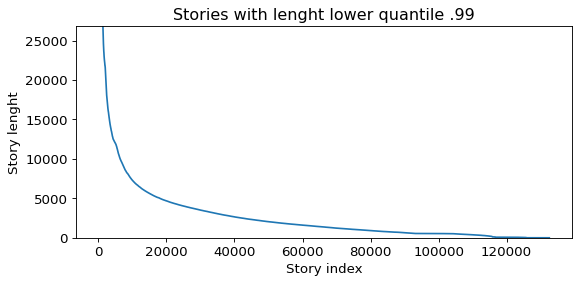

In [10]:
# Посмотрим на квантили длины текстов новостей.
quantiles_list = [1.00, 0.99, 0.95, 0.9, 0.75, 0.5, 0.25, 0.1, 0.01, 0.00]
print('Average number of symbols per news text:', all_headlines_df['story_len'].mean( ))
print('Story lenght quantiles:')
print(all_headlines_df['story_len'].quantile(quantiles_list))

# Выстроим новости по убыванию их длины
all_headlines_df['story_len'].sort_values(ascending=False).reset_index(drop=True).plot(ylim=(0, all_headlines_df['story_len'].quantile(0.99)))
plt.title('Stories with lenght lower quantile .99')
plt.xlabel('Story index')
plt.ylabel('Story lenght')

In [11]:
all_headlines_df.groupby('sourceCode').agg(
    stories_count=('storyId', 'count'),
    stories_mean_length=('story_len', 'mean')
).sort_values(by='stories_count', ascending=False).head(30)

,stories_count,stories_mean_length
sourceCode,,
NS:RTRS,60752,2210.173920
NS:RAUT,9905,527.295507
NS:PUBT,5195,9234.594418
NS:EQS,4042,5628.535873
NS:EDG,3016,72.863064
NS:GLFILE,2872,72.582521
NS:ENPNWS,2505,4185.874651
NS:AWP,2454,23122.661369
NS:DATMTR,2333,1997.238748


In [12]:
# Вытащим язык статьи и сосздадим отдельный столбец
# Только у пропущенных пустых статей нет языка

all_headlines_df['story_lang'] = np.nan

for index in all_headlines_df.index:
    story_now = all_headlines_df.loc[index, 'story']
    try:
        all_headlines_df.loc[index, 'story_lang'] = re.findall(r' lang="(.*)"', story_now)[0].split('"')[0]
    except Exception as e:
        print(index, e, story_now)

159 list index out of range nan
200 list index out of range nan
362 list index out of range nan
694 list index out of range nan
732 list index out of range nan
736 list index out of range nan
998 list index out of range nan
1038 list index out of range nan
1339 list index out of range nan
1354 list index out of range nan
1361 list index out of range nan
1577 list index out of range nan
1812 list index out of range nan
1820 list index out of range nan
1937 list index out of range nan
2528 list index out of range nan
2744 list index out of range nan
2864 list index out of range nan
3019 list index out of range nan
3443 list index out of range nan
3449 list index out of range nan
3551 list index out of range nan
3597 list index out of range nan
3716 list index out of range nan
3874 list index out of range nan
4150 list index out of range nan
4159 list index out of range nan
4202 list index out of range nan
4240 list index out of range nan
4246 list index out of range nan
4330 list index o

<AxesSubplot:ylabel='story_lang'>

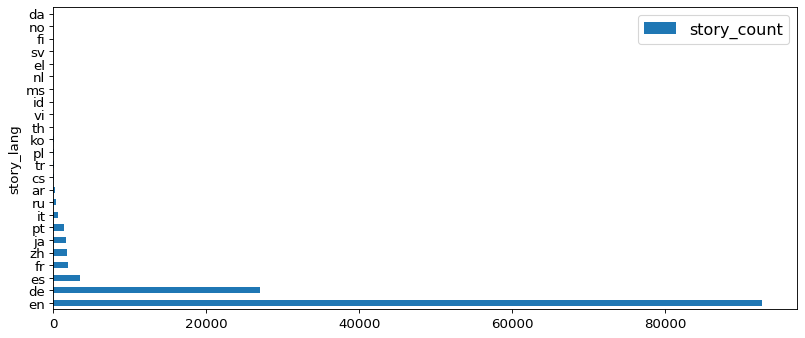

In [13]:
all_headlines_df['story_lang']
top_languages = all_headlines_df.groupby(by='story_lang').agg(
    story_count=('storyId', 'count')
).sort_values(by='story_count', ascending=False)
top_languages.plot(kind='barh', figsize=(12,5))

In [14]:
top_languages.index

Index(['en', 'de', 'es', 'fr', 'zh', 'ja', 'pt', 'it', 'ru', 'ar', 'cs', 'tr',
       'pl', 'ko', 'th', 'vi', 'id', 'ms', 'nl', 'el', 'sv', 'fi', 'no', 'da'],
      dtype='object', name='story_lang')

Text(0.5, 1.0, 'Stacked bar chart of news text languages')

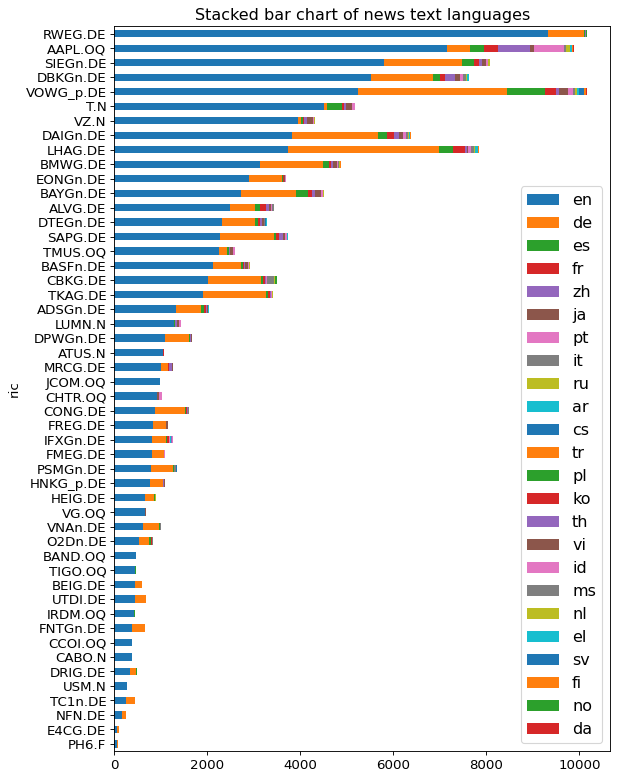

In [15]:
# Посчитаем groupby таблицу, чтобы потом построить pivot для stacked bar chart
for_pivot_groupby_ric_lang = all_headlines_df.groupby(by=['ric', 'story_lang']).agg(
    story_count=('storyId', 'count'))

# Вытащим из индекса столбцы
for_pivot_groupby_ric_lang[for_pivot_groupby_ric_lang.index.names[0]] = for_pivot_groupby_ric_lang.index.get_level_values(0)
for_pivot_groupby_ric_lang[for_pivot_groupby_ric_lang.index.names[1]] = for_pivot_groupby_ric_lang.index.get_level_values(1)

pivot_ric_lang = for_pivot_groupby_ric_lang.pivot(index='ric', columns='story_lang', values='story_count')
pivot_ric_lang = pivot_ric_lang[top_languages.index]
pivot_ric_lang = pivot_ric_lang.sort_values(by='en', ascending=True)
pivot_ric_lang.plot.barh(stacked=True, figsize=(8,12))
plt.legend(loc='lower right')
plt.title('Stacked bar chart of news text languages')
plt.xlabel('Seconds per query')
plt.ylabel('Frequency')
# plt.grid(True, axis='x')
plt.savefig(path_project_folder + 'exhibits_saved/'+ 'Histogram of query time execution without drawouts (seconds)', bbox_inches = "tight")


<AxesSubplot:>

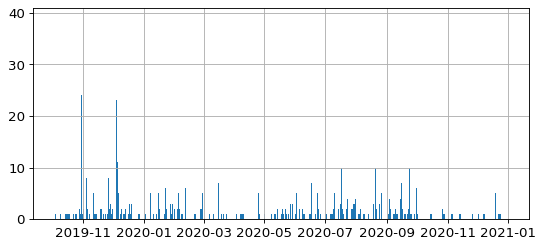

In [16]:
# Как часто публикуются новости у одной компании (почасовая разбивка 15 месяцев) # VOWG_p.DE, DTEGn.DE
all_headlines_df[(all_headlines_df['ric'] == 'VOWG_p.DE')]['versionCreated'].hist(bins=(365+90)*24)

In [17]:
all_headlines_df.head(1)

,ric,versionCreated,headline,storyId,sourceCode,story,story_wo_html,story_len,story_lang
0,DTEGn.DE,2020-12-23 18:25:27.865000+00:00,IGN Igen Networks joins T-Mobile partner program,urn:newsml:reuters.com:20201223:nNRAdspppv:1,NS:CNSWCH,"<div class=""storyContent"" lang=""en""><style typ...",Igen Networks Corp. has joined the T-Mobile pa...,1827,en


In [18]:
all_headlines_df.loc[500, 'story_wo_html']

'** Goldman Sachs adds Germany\'s Deutsche Telekom DTEGn.DE to its conviction list and reiterates its "buy" rating as it sees FCF to still treble** The broker says its management meetings have highlighted mitigating factors that should halve the FCF hit to just EUR 500 million annually, less than 10% of 2023 group FCF** It notes the above removes the "key bear risk" on the company and FCF is still to treble as capex bear risk recedes ** Despite the higher fibre spend, Deutsche Telekom still offers best-in-sector growth, the brokerage adds, saying it trades at discount multiple(( marta.frackowiak@thomsonreuters.com ))(c) Copyright Thomson Reuters 2020. Click For Restrictions - https://agency.reuters.com/en/copyright.html'

In [19]:
import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
print(word_tokenize(all_headlines_df.loc[500, 'story_wo_html']))

['*', '*', 'Goldman', 'Sachs', 'adds', 'Germany', "'s", 'Deutsche', 'Telekom', 'DTEGn.DE', 'to', 'its', 'conviction', 'list', 'and', 'reiterates', 'its', '``', 'buy', "''", 'rating', 'as', 'it', 'sees', 'FCF', 'to', 'still', 'treble', '*', '*', 'The', 'broker', 'says', 'its', 'management', 'meetings', 'have', 'highlighted', 'mitigating', 'factors', 'that', 'should', 'halve', 'the', 'FCF', 'hit', 'to', 'just', 'EUR', '500', 'million', 'annually', ',', 'less', 'than', '10', '%', 'of', '2023', 'group', 'FCF', '*', '*', 'It', 'notes', 'the', 'above', 'removes', 'the', '``', 'key', 'bear', 'risk', "''", 'on', 'the', 'company', 'and', 'FCF', 'is', 'still', 'to', 'treble', 'as', 'capex', 'bear', 'risk', 'recedes', '*', '*', 'Despite', 'the', 'higher', 'fibre', 'spend', ',', 'Deutsche', 'Telekom', 'still', 'offers', 'best-in-sector', 'growth', ',', 'the', 'brokerage', 'adds', ',', 'saying', 'it', 'trades', 'at', 'discount', 'multiple', '(', '(', 'marta.frackowiak', '@', 'thomsonreuters.com', '

In [20]:
tokenized_df = pd.DataFrame(data = [], columns=[
    "ric", "storyId", "token"
])

In [21]:
# for index, row in all_headlines_df.iterrows():
#     tokenized_story_slice = pd.DataFrame(data = [], columns=["ric", "storyId", "token"])
#     tokenized_story_slice['token'] = word_tokenize(row['story_wo_html'])
#     tokenized_story_slice['ric'] = row['ric']
#     tokenized_story_slice['storyId'] = row['storyId']
#     tokenized_df = tokenized_df.append(tokenized_story_slice, ignore_index = True)
#     if index % 500 == 0:
#         print(index, end=' ')

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from pandas import DataFrame

In [23]:
texts_list = all_headlines_df[(all_headlines_df['ric'] == 'DTEGn.DE') & (all_headlines_df['story_lang'] == 'en')]['story_wo_html']
count_vect = CountVectorizer()
tfidf_vect = TfidfVectorizer()

In [24]:
def create_document_term_matrix(message_list, vectorizer):
    doc_term_matrix = vectorizer.fit_transform(message_list)
    return DataFrame(doc_term_matrix.toarray(), 
                     columns=vectorizer.get_feature_names())

In [25]:
texts_matrix = create_document_term_matrix(texts_list, tfidf_vect)
texts_matrix_transposed = texts_matrix.transpose()

In [26]:
texts_matrix

,00,000,0000,00000000,0000the,0001,000aggregate,000ft²,000m2,000mah,...,šodolovci,štrigova,željko,žilina,žminj,žunić,župa,οτε,тhe,ﬁnancial
0,0.0,0.056471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2318,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2319,0.0,0.013428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2320,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
texts_matrix_transposed['max_token'] = texts_matrix_transposed.idxmax(axis=1)

In [28]:
texts_matrix.max().sort_values(ascending=False)

amdocs           0.806965
denars           0.796914
vlocity          0.782096
eschat           0.777534
gci              0.773703
                   ...   
wallgau          0.001064
brightened       0.001064
hub4industry     0.001064
lampertswalde    0.001064
concierge        0.001064
Length: 28003, dtype: float64

In [29]:
texts_matrix_transposed['max_token'].sort_values(ascending=False).head()

xboxpress         2319
xcloud            2319
game              2319
20190924006100    2319
163               2315
Name: max_token, dtype: int64

In [64]:
# Выгрузим конкрентные компании, чтобы их новости можно было полистать

num_of_stories_per_rics = all_headlines_df.groupby(by='ric').agg(
    story_count=('storyId', 'count')
).sort_values(by='story_count', ascending=False)

all_headlines_df['versionCreated'] = all_headlines_df['versionCreated'].astype(str)

for ric_now in num_of_stories_per_rics.index:
    file_name = 'only_one_ric_' + str(ric_now)
    folder_name = path_project_folder + 'rics_separated/'
    path_for_excel_to_save = folder_name + file_name + ".xlsx"
    all_headlines_df[all_headlines_df['ric'] == ric_now].to_excel(path_for_excel_to_save) 
    print(ric_now, path_for_excel_to_save)

all_headlines_df['versionCreated'] = pd.to_datetime(all_headlines_df['versionCreated'])

RWEG.DE C:/DAN/t_systems/trade_project/rics_separated/only_one_ric_RWEG.DE.xlsx
VOWG_p.DE C:/DAN/t_systems/trade_project/rics_separated/only_one_ric_VOWG_p.DE.xlsx
AAPL.OQ C:/DAN/t_systems/trade_project/rics_separated/only_one_ric_AAPL.OQ.xlsx
SIEGn.DE C:/DAN/t_systems/trade_project/rics_separated/only_one_ric_SIEGn.DE.xlsx
LHAG.DE C:/DAN/t_systems/trade_project/rics_separated/only_one_ric_LHAG.DE.xlsx
DBKGn.DE C:/DAN/t_systems/trade_project/rics_separated/only_one_ric_DBKGn.DE.xlsx
DAIGn.DE C:/DAN/t_systems/trade_project/rics_separated/only_one_ric_DAIGn.DE.xlsx
T.N C:/DAN/t_systems/trade_project/rics_separated/only_one_ric_T.N.xlsx
BMWG.DE C:/DAN/t_systems/trade_project/rics_separated/only_one_ric_BMWG.DE.xlsx
BAYGn.DE C:/DAN/t_systems/trade_project/rics_separated/only_one_ric_BAYGn.DE.xlsx
VZ.N C:/DAN/t_systems/trade_project/rics_separated/only_one_ric_VZ.N.xlsx
SAPG.DE C:/DAN/t_systems/trade_project/rics_separated/only_one_ric_SAPG.DE.xlsx
EONGn.DE C:/DAN/t_systems/trade_project/ri